# 1. Overview of the Dataset and Loading the Libraries and Dataset

The dataset is time series data that contains customer purchase history over 13 months. It contains transactional data, including details such as invoice numbers, customer IDs, product categories, revenue, and quantities, which can be used to analyze customer behavior, category performance, and revenue trends over time. The required task are:

1. Analyse and compare the monthly fluctuations in total revenue and the
number of transactions. Identify any significant anomalies or outliers.
2. Determine which product categories have the highest total revenue and
demonstrate consistent revenue growth trends. Identify any categories with
sustained increases in sales.
3. Explore the seasonal variations in sales for different product categories. Are
there any categories that are sensitive to specific time periods?
4. Analyse shifts in customer purchasing behaviour across multiple transactions
to identify recurring patterns or significant changes in preferences. Determine
whether these trends can provide actionable insights for enhancing the
company's marketing strategy.


In [3]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from matplotlib.colors import ListedColormap

In [4]:
# Loading the dataset  into pandas dataframe
data = pd.read_csv(r'purchase_data.csv', encoding='Latin-1')

#create a copy of the dataset as per best practice
df = data.copy()

# 2. Data Exploration

In [6]:
# displaying the 1st five columns of the dataset
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [7]:
# displaying the last five columns of the dataset
print("Last 5 Rows of the Dataset:")
df.tail()

Last 5 Rows of the Dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [8]:
# number of rows and columns in the dataset
print(f"The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe contains 541909 rows and 8 columns


In [9]:
# shape of the dataset
df.shape

(541909, 8)

In [10]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


3 columns seems to have inappropriate data type. Invoice No., Stock Code, will be converted to integer while invoce Date wil be converted to datetime data type. The information here sugestes missing data in desciption and customer id

In [12]:
# Statistical summary of the numeric columns in the dataset
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# checking for null values in each row
print("\nThe null values in each row are:")
df.isnull().sum()


The null values in each row are:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The columns with missing values are Description and CustomerID

In [15]:
# percentage of missing values for each column
missing_percentage = ((df.isnull().sum() / len(df)) * 100).round(1)
missing_percentage

InvoiceNo       0.0
StockCode       0.0
Description     0.3
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID     24.9
Country         0.0
dtype: float64

About 25% of the customer id values are null, while 0.3% of the description values are null. The percentage of missing values in description is insignificant, while that of customer id is significant considering the records in the dataset. 

In [17]:
# records with null values in CustomerID
missing_data = data[data['CustomerID'].isna()]
missing_data.describe()

,Quantity,UnitPrice,CustomerID
count,135080.000000,135080.000000,0.0
mean,1.995573,8.076577,NaN
std,66.696153,151.900816,NaN
min,-9600.000000,-11062.060000,NaN
25%,1.000000,1.630000,NaN
50%,1.000000,3.290000,NaN
75%,3.000000,5.450000,NaN
max,5568.000000,17836.460000,NaN


In [18]:
# displaying null values in the customerID and groupby country
missing_data['Country'].value_counts()

Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: count, dtype: int64

Text(0, 0.5, 'Number of Missing Values')

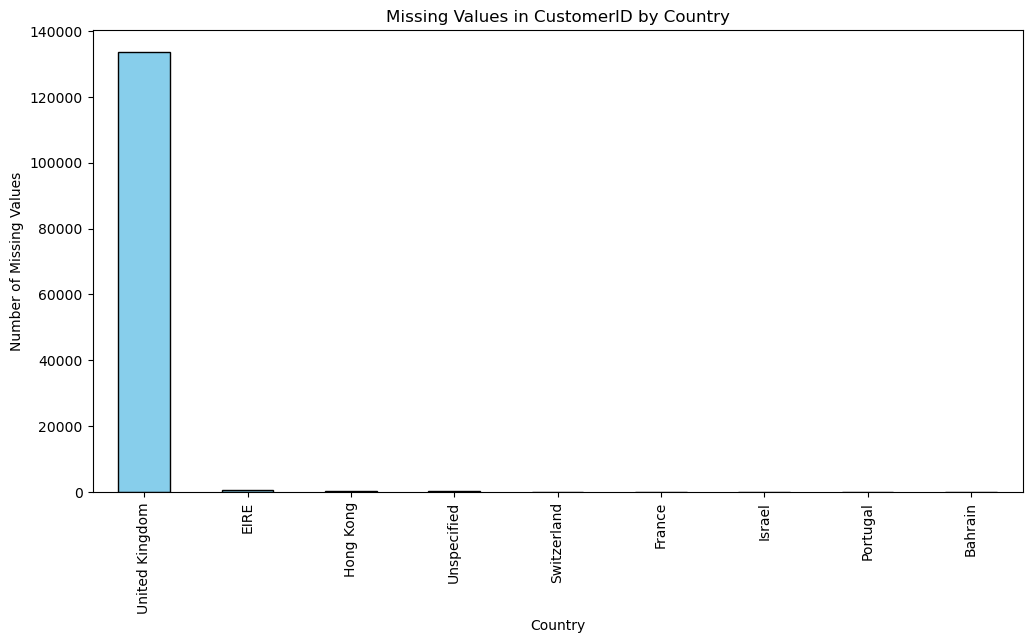

In [19]:
# graphical display of null values in the customerID and groupby country
missing_data['Country'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Missing Values in CustomerID by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missing Values')

The bar chart above shows that about 99% of the missing CustomerIDs are from the United Kingdom. 

In [21]:
# displaying the dataframe with missing description values
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01/12/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01/12/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01/12/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,07/12/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,07/12/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,07/12/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,08/12/2011 10:33,0.0,NaN,United Kingdom


There are 1,454 records with NaN values in the description. This will be deleted as it is unlikely to impact the analysis due to the small number/percent of NaN values. 

In [23]:
# checking for special character in the description, first define the special characters
special_characters = r'[?#$@!]'

# Function to check for specific special characters
def contains_specific_special_chars(text):
    # Ensure the input is a string
    if isinstance(text, str):
        return bool(re.search(special_characters, text))
    return False  # Return False for non-string values

# Filter rows where the 'description' column contains specific special characters
filtered_df = df[df['Description'].apply(contains_specific_special_chars)]
print(filtered_df.shape)
filtered_df.head()

(147, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,03/12/2010 16:50,0.00,NaN,United Kingdom
10422,537237,22108,PING! MICROWAVE PLATE,1,06/12/2010 09:58,3.36,NaN,United Kingdom
13487,537434,22108,PING! MICROWAVE PLATE,1,06/12/2010 16:57,3.36,NaN,United Kingdom
15257,537638,22108,PING! MICROWAVE PLATE,1,07/12/2010 15:28,3.36,NaN,United Kingdom
18750,537823,22108,PING! MICROWAVE PLATE,2,08/12/2010 14:25,3.36,NaN,United Kingdom


In [24]:
# count of special character
filtered_df['Description'].value_counts()

Description
PING! MICROWAVE PLATE                  63
?                                      47
??                                      7
damages?                                5
???missing                              2
?missing                                2
sold in set?                            1
missing?                                1
???                                     1
lost??                                  1
wet?                                    1
? sold as sets?                         1
????missing                             1
?? missing                              1
check?                                  1
???lost                                 1
historic computer difference?....se     1
mystery! Only ever imported 1800        1
OOPS ! adjustment                       1
?sold as sets?                          1
?lost                                   1
?display?                               1
code mix up? 84930                      1
damages/dotcom?       

# 3. Data Cleaning

The dataset cleaning process will be conducted on a column-by-column basis to ensure thoroughness

## 3.1 Invoice Number

Invoice No. needs to be converted to the appropriate data type, which is integer.

In [29]:
# displaying the number of unique values in the InvoiceNo column
df['InvoiceNo'].nunique()

25900

In [30]:
# displaying the unique values in the InvoiceNo column
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

The above code gave an error "ValueError: invalid literal for int() with base 10: 'C536379'". indicating that the column has alphanumeric values

In [32]:
# displaying the first 15 rows of the dataframe where InvoiceNo has alphanumeric values
alpha_num_invoice_no = df[~df['InvoiceNo'].str.isdigit()]
alpha_num_invoice_no.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01/12/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,01/12/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,01/12/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,01/12/2010 12:38,4.25,17897.0,United Kingdom


In [33]:
# number of records with alphanumeric values
len(alpha_num_invoice_no)

9291

The InvoiceNo column has a letter prefixing some values in the column and these are occurring in 9,291 records

In [35]:
# extracting the digits from the alphanumeric values in the column and converting the column to integer
df["InvoiceNo"] = df["InvoiceNo"].str.extract(r'(\d+)').astype(int)

In [36]:
# checking the data type of the InvoiceNo column
df['InvoiceNo'].dtype

dtype('int32')

The string extract method and regex was used to extract digits from the column values, then converted to int and assigned back to the column.

## 3.2 StockCode

In [39]:
# displaying the number of unique values in the StockCode column
df['StockCode'].nunique()

4070

In [40]:
# displaying the unique values in the StockCode column
df['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

Some StockCode values have a letter as suffix. 

The above code prompted a value error "ValueError: invalid literal for int() with base 10: '85123A'"
The  values in the StockCode column is alphanumeric and will have to be cleaned before converted to integer

In [43]:
# displaying the datafarame of the first 20 rows of StockCode
alpha_num_stockcode = df[~df["StockCode"].str.isdigit().fillna(False)]
alpha_num_stockcode.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,01/12/2010 08:45,18.00,12583.0,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 09:02,2.55,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 09:02,2.75,17850.0,United Kingdom
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,01/12/2010 09:02,2.55,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 09:02,3.39,17850.0,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 09:02,3.39,17850.0,United Kingdom


Some of the values in the stock code column are entirely text, some are alphanumeric while other are numeric.

In [45]:
# displaying the dataframe where StockCode values are entirely text
alpha_stockcode = df[df["StockCode"].str.fullmatch(r"[a-zA-Z]+", na=False)]
print(alpha_stockcode.shape)
alpha_stockcode.head(20)

(2759, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,01/12/2010 08:45,18.00,12583.0,France
141,536379,D,Discount,-1,01/12/2010 09:41,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,01/12/2010 11:27,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,01/12/2010 13:04,18.00,12662.0,Germany
1814,536544,DOT,DOTCOM POSTAGE,1,01/12/2010 14:32,569.77,NaN,United Kingdom
2239,536569,M,Manual,1,01/12/2010 15:35,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,01/12/2010 15:35,18.95,16274.0,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,01/12/2010 17:06,607.49,NaN,United Kingdom
5073,536840,POST,POSTAGE,1,02/12/2010 18:27,18.00,12738.0,Germany
5258,536852,POST,POSTAGE,1,03/12/2010 09:51,18.00,12686.0,France


2759  records have entirely text in the stock code column

In [47]:
# displaying the unique text values in the StockCode column where stockcode is entirely test
alpha_stockcode['StockCode'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [48]:
# displaying the number of unique text values in the StockCode column
alpha_stockcode['StockCode'].nunique()

12

There are 12 unique text values inthe stock code column. The code below lays out the step to clean the stock code column

In [50]:
# Step 1: Extract numeric parts from alphanumeric values
df["StockCode_Cleaned"] = df["StockCode"].str.extract(r'(\d+)')


# Step 2: Convert the cleaned column to numeric
df["StockCode_Cleaned"] = pd.to_numeric(df["StockCode_Cleaned"], errors="coerce")


# Step 3: Drop rows where conversion failed
df = df.dropna(subset=["StockCode_Cleaned"])


# Step 4: Convert the cleaned column to integers
df["StockCode_Cleaned"] = df["StockCode_Cleaned"].astype(int)

In [51]:
df["StockCode_Cleaned"].dtype

dtype('int32')

In [52]:
# dropping the original StockCode column
df.drop('StockCode', axis=1, inplace=True)

In [53]:
df.shape

(539113, 8)

In cleaning, the Stock Code digits were extracted using string extract method and regex, then convered to numeric and assigned to a new column called  "StockCode_Cleaned". Values that could not be converted to numeric were dropped from "StockCode_Cleaned". Also, "StockCode" was dropped from the dataframe.

## 3.3 Description

In [56]:
# displaying some of the unique values in the description column
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [57]:
# displaying the dataframe with missing description values
df[df['Description'].isnull()]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
622,536414,NaN,56,01/12/2010 11:52,0.0,NaN,United Kingdom,22139
1970,536545,NaN,1,01/12/2010 14:32,0.0,NaN,United Kingdom,21134
1971,536546,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom,22145
1972,536547,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom,37509
1987,536549,NaN,1,01/12/2010 14:34,0.0,NaN,United Kingdom,85226
...,...,...,...,...,...,...,...,...
535322,581199,NaN,-2,07/12/2011 18:26,0.0,NaN,United Kingdom,84581
535326,581203,NaN,15,07/12/2011 18:31,0.0,NaN,United Kingdom,23406
535332,581209,NaN,6,07/12/2011 18:35,0.0,NaN,United Kingdom,21620
536981,581234,NaN,27,08/12/2011 10:33,0.0,NaN,United Kingdom,72817


There are 1,449 records with missing values in the description. These will be dropped as the number is insignificant and will have no impact in the analysis due to the small number compared to the number of records in the dataset

In [59]:
# Drop rows with null values in Description Column
df.dropna(subset=['Description'], inplace=True)

In [60]:
# checking for null values in the description column
df[df['Description'].isnull()]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned


In the EDA section, special characters was defined, and a dataframe "filtered_df" was assigned to all rows in the description column with special character. The code below drops rows with special character

In [62]:
# deleting rows with special character excluding rows with "PING! MICROWAVE PLATE"
rows_to_keep = filtered_df['Description'] == "PING! MICROWAVE PLATE"

# Remove rows from `df` that are in `filtered_df` but not "PING! MICROWAVE PLATE"
df = df[~(df.index.isin(filtered_df[~rows_to_keep].index))]

In [63]:
# cofirming rows with special characters have been dropped
df[df['Description'] == '?']

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned


In [64]:
# cofirming rows with special characters have been dropped
len(df[df['Description'] == '?'])

0

A total of 47 records with special character in the description column were deleted

## 3.4 Quantity

Text(0, 0.5, 'Frequency')

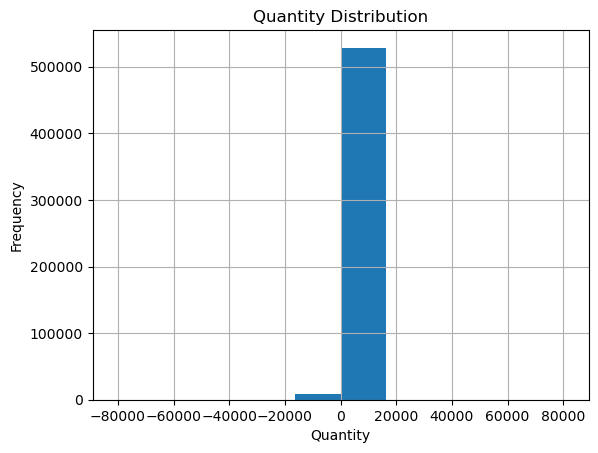

In [67]:
# histogram of the quantity column
df['Quantity'].hist()
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

In [68]:
# number of unique quantity values 
df['Quantity'].nunique()

626

In [69]:
# displaying the unique quantity values 
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     50,     -1,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     11,     33,     13,     -4,
           -5,     -7,     -3,     70,    252,     60,    216,    384,
           27,     15,     22,     19,     17,     21,     34,     47,
          108,     52,  -9360,     75,    270,     42,    240,     90,
          320,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     39,    -48,    -50,     56,     26,   1440,
           31,     82,     78,     97,     98,     35,     -8,    720,
          -20,    156,    324,     38,     37,     49,     95,     -9,
          -11,     29,     41,    -10,    -72,    -35,    -43,    402,
      

Quantity in the dataset contains both negative and positive values

Text(0.5, 1.0, 'Box Plot of Quantity Column')

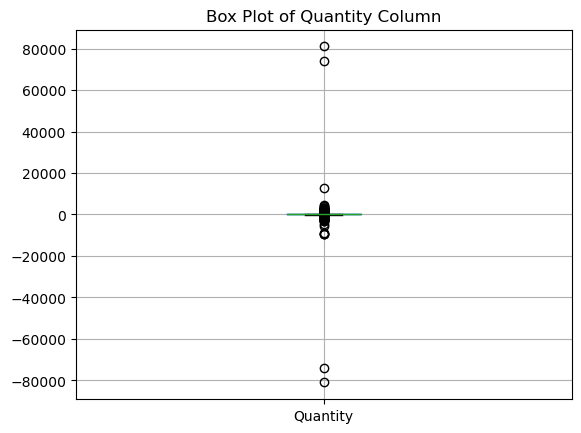

In [71]:
# boxplot of quantity
df.boxplot(column='Quantity')
plt.title('Box Plot of Quantity Column')


The boxplot and histogram suggest that there are extreme negative and positive values in the quantity, which can be regarded as outliers. 

In [73]:
# displaying the dataframe where quantity is less than -60000. These are outliers
df[df['Quantity'] < -60000]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
61624,541433,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18/01/2011 10:17,1.04,12346.0,United Kingdom,23166
540422,581484,"PAPER CRAFT , LITTLE BIRDIE",-80995,09/12/2011 09:27,2.08,16446.0,United Kingdom,23843


In [74]:
# displaying the dataframe where quantity is greater than 3500. These are outliers
df[df['Quantity'] > 3500]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
61619,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,18/01/2011 10:01,1.04,12346.0,United Kingdom,23166
97432,544612,EMPIRE DESIGN ROSETTE,3906,22/02/2011 10:43,0.82,18087.0,United Kingdom,22053
206121,554868,SMALL POPCORN HOLDER,4300,27/05/2011 10:52,0.72,13135.0,United Kingdom,22197
421632,573008,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,27/10/2011 12:26,0.21,12901.0,United Kingdom,84077
502122,578841,ASSTD DESIGN 3D PAPER STICKERS,12540,25/11/2011 15:57,0.00,13256.0,United Kingdom,84826
540421,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,09/12/2011 09:15,2.08,16446.0,United Kingdom,23843


In [75]:
# displaying the extreme outliers
df[(df['Quantity'] > 12000) | (df['Quantity'] < -60000)]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
61619,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,18/01/2011 10:01,1.04,12346.0,United Kingdom,23166
61624,541433,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18/01/2011 10:17,1.04,12346.0,United Kingdom,23166
502122,578841,ASSTD DESIGN 3D PAPER STICKERS,12540,25/11/2011 15:57,0.00,13256.0,United Kingdom,84826
540421,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,09/12/2011 09:15,2.08,16446.0,United Kingdom,23843
540422,581484,"PAPER CRAFT , LITTLE BIRDIE",-80995,09/12/2011 09:27,2.08,16446.0,United Kingdom,23843


Extreme values will be considered outliers, while the others will be retained. As displayed in the dataframe values above 12,000 and less than -60,000 will be considered as outliers for this analysis

In [77]:
# displaying the dataframe where quantity is less than or equal to zero
df[df['Quantity']  <= 0 ]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
154,536383,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 09:49,4.65,15311.0,United Kingdom,35004
235,536391,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom,22556
236,536391,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom,21984
237,536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom,21983
238,536391,PACK OF 12 RED RETROSPOT TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom,21980
...,...,...,...,...,...,...,...,...
540448,581490,VICTORIAN GLASS HANGING T-LIGHT,-12,09/12/2011 09:57,1.95,14397.0,United Kingdom,22178
540449,581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,09/12/2011 09:57,0.83,14397.0,United Kingdom,23144
541715,581568,VICTORIAN SEWING BOX LARGE,-5,09/12/2011 11:57,10.95,15311.0,United Kingdom,21258
541716,581569,HANGING HEART JAR T-LIGHT HOLDER,-1,09/12/2011 11:58,1.25,17315.0,United Kingdom,84978


9139 transaction records have negative quantity values, which are likely erraneous data. Outliers and records with quantity value less than or equal to zero will be dropped

In [79]:
# slicing off the outliers in the dataset
df = df[(df['Quantity'] > 0) & (df['Quantity'] < 12000)]

In [80]:
# checking that the outliers and values less than or equal to zero have been dropped
df[df['Quantity']  <= 0 ]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned


In [81]:
# checking the number of rows in the dataset
df.shape

(528474, 8)

Text(0.5, 1.0, 'Box Plot of Quantity Column')

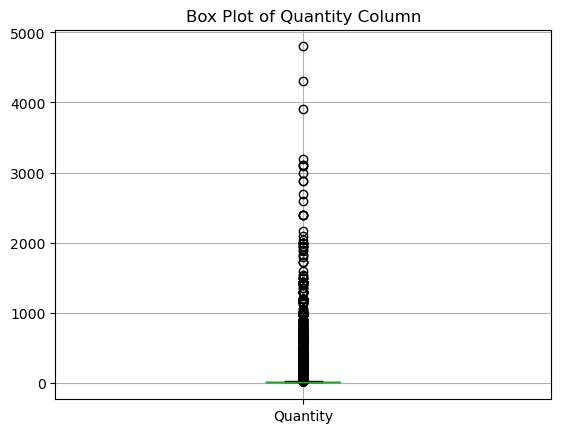

In [82]:
# boxplot of quantity after removing the outliers
df.boxplot(column='Quantity')
plt.title('Box Plot of Quantity Column')

Though some outliers exist but we can make do with these

## 3.5 Invoice Date 

In [85]:
# Convert InvoiceDate to datetime, specifying the format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d/%m/%Y %H:%M", errors='coerce')

In [86]:
# checking the dtype of the inoice date column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528474 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          528474 non-null  int32         
 1   Description        528474 non-null  object        
 2   Quantity           528474 non-null  int64         
 3   InvoiceDate        528474 non-null  datetime64[ns]
 4   UnitPrice          528474 non-null  float64       
 5   CustomerID         396500 non-null  float64       
 6   Country            528474 non-null  object        
 7   StockCode_Cleaned  528474 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 32.3+ MB


In [87]:
print("\nThe start invoice date and time is:")
print(df['InvoiceDate'].min())
print("\nThe end invoice date and time is:")
print(df['InvoiceDate'].max())


The start invoice date and time is:
2010-12-01 08:26:00

The end invoice date and time is:
2011-12-09 12:50:00


The period under review is 13 months and 8 days, spanning December 1, 2010, to December 9, 2011

## 3.6 Unit Price

Text(0, 0.5, 'Frequency')

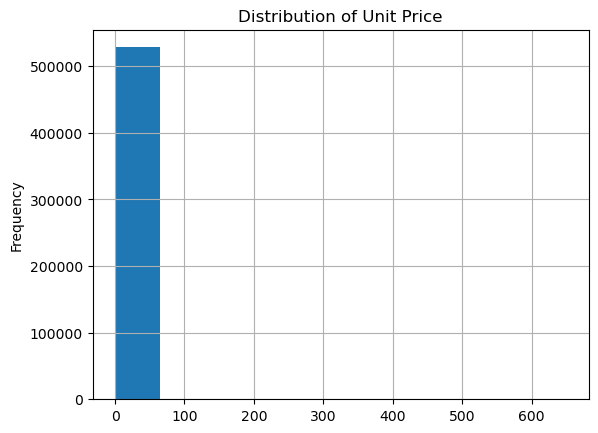

In [90]:
# histogram of the unit price column
df['UnitPrice'].hist()
plt.title('Distribution of Unit Price')
plt.ylabel('Frequency')

The Unit Price column is right skewed indicating the present of outliers

Text(0.5, 1.0, 'Box Plot of Quantity Column')

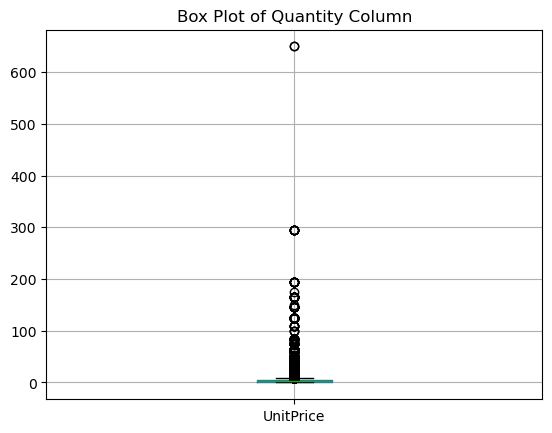

In [92]:
# boxplot of unit price
df.boxplot(column='UnitPrice')
plt.title('Box Plot of Quantity Column')

In [93]:
# displaying the outlier
df[df['UnitPrice'] > 300 ]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
222680,556444,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,22502
222682,556446,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom,22502


There ae 2 data points that can be considered as outliers as shown in the dataframe and charts above. 

In [95]:
# records where unit price is zero
unit_price_zero = df[df['UnitPrice'] == 0]
unit_price_zero.head(15)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
6391,536941,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom,22734
6392,536942,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom,22139
9302,537197,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,22841
14335,537534,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom,85064
14336,537534,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom,84832
14337,537534,BOX OF 24 COCKTAIL PARASOLS,2,2010-12-07 11:48:00,0.0,NaN,United Kingdom,84692
14338,537534,DOORMAT ENGLISH ROSE,3,2010-12-07 11:48:00,0.0,NaN,United Kingdom,48184
14339,537534,DOORMAT 3 SMILEY CATS,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom,48111
14340,537534,GREEN REGENCY TEACUP AND SAUCER,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom,22697
14341,537534,FRENCH BLUE METAL DOOR SIGN 7,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom,22682


In [96]:
# shape of dataframe where price is zero
unit_price_zero.shape

(570, 8)

570 records have unit price as zero. This is likely erraneous and will be dropped

In [98]:
# retaining records with unit price greater than 0 and  less than 250
df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 250)]

In [99]:
# confirming dropped
df[df['UnitPrice'] == 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned


<Axes: >

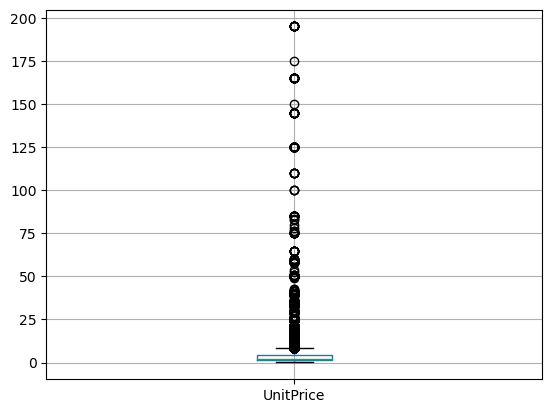

In [100]:
# boxplot of unit price
df.boxplot(column='UnitPrice')

Though there are still outliers but these can be worked with

## 3.7 CustomerID 

In [103]:
# fill NaN will "1111"
df['CustomerID'] = df['CustomerID'].fillna(0).astype(int)

In [104]:
# detail of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527894 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          527894 non-null  int32         
 1   Description        527894 non-null  object        
 2   Quantity           527894 non-null  int64         
 3   InvoiceDate        527894 non-null  datetime64[ns]
 4   UnitPrice          527894 non-null  float64       
 5   CustomerID         527894 non-null  int32         
 6   Country            527894 non-null  object        
 7   StockCode_Cleaned  527894 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(2)
memory usage: 30.2+ MB


In [105]:
# checking for null values
df.isna().any()

InvoiceNo            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID           False
Country              False
StockCode_Cleaned    False
dtype: bool

## 3.8 Country 

In [107]:
# displaying the number of unique countries
df['Country'].nunique()

38

In [108]:
# displaying the unique countries
print(f"There are {df['Country'].nunique()} unique countries comprising: {df['Country'].unique()}")

There are 38 unique countries comprising: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


There is a country in the list named unspecified. The code below shows the percentage and number of records in each country

In [110]:
# Calculate value counts and percentages
country_counts = df['Country'].value_counts()
country_percentages = (country_counts / len(df)) * 100

# Create a new DataFrame with counts and percentages
country_stats = pd.DataFrame({'Count': country_counts, 'Percentage': country_percentages})

# Print the results
print(country_stats) 

                       Count  Percentage
Country                                 
United Kingdom        484029   91.690567
Germany                 8658    1.640102
France                  8102    1.534778
EIRE                    7885    1.493671
Spain                   2422    0.458804
Netherlands             2322    0.439861
Switzerland             1935    0.366551
Belgium                 1935    0.366551
Portugal                1464    0.277328
Australia               1181    0.223719
Norway                  1048    0.198525
Channel Islands          747    0.141506
Italy                    741    0.140369
Finland                  647    0.122562
Cyprus                   612    0.115932
Unspecified              446    0.084487
Sweden                   428    0.081077
Austria                  384    0.072742
Denmark                  367    0.069522
Poland                   325    0.061565
Japan                    321    0.060808
Israel                   295    0.055882
Hong Kong       

Text(0, 0.5, 'Frequency')

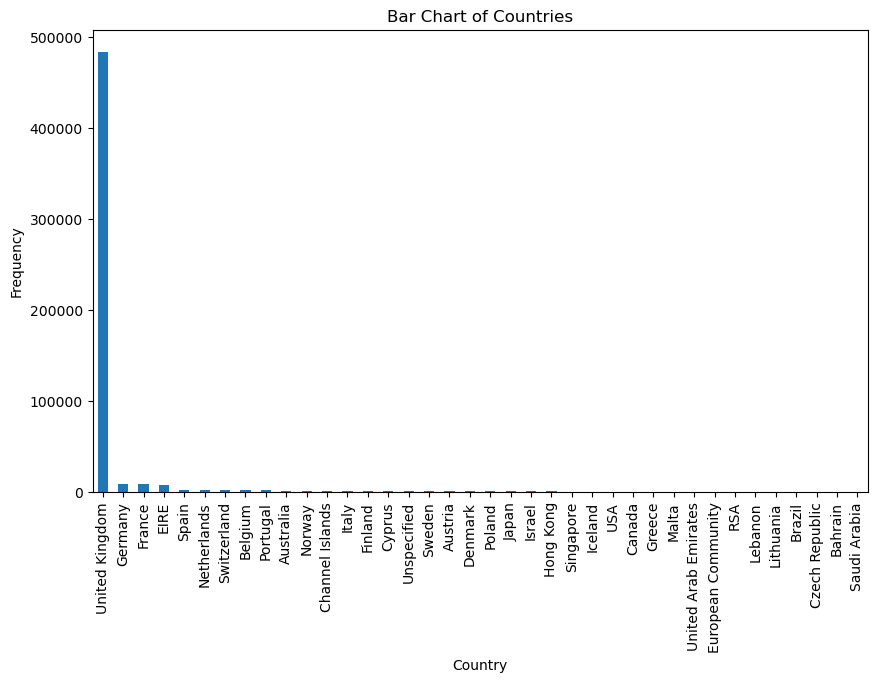

In [111]:
# bar chart with countries and frequencies
df['Country'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Bar Chart of Countries')
plt.ylabel('Frequency')

Approximately 92% of the records are from UK

In [113]:
# displaying countries with unspecified countries
unspecified_country = df[df['Country'] == 'Unspecified']
unspecified_country.head(10)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
152712,549687,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363,Unspecified,20685
152713,549687,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363,Unspecified,22691
152714,549687,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363,Unspecified,48116
152715,549687,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified,21213
152716,549687,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified,21977
152717,549687,PACK OF 60 MUSHROOM CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified,21976
152718,549687,PACK OF 72 RETROSPOT CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified,21212
152719,549687,72 SWEETHEART FAIRY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified,84992
152720,549687,60 TEATIME FAIRY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363,Unspecified,84991
152721,549687,SET OF 36 PAISLEY FLOWER DOILIES,12,2011-04-11 13:29:00,1.45,12363,Unspecified,21974


In [114]:
# number of records where contry is unspecified
unspecified_country.shape

(446, 8)

In [115]:
# dropping records with unspecified countries
df = df[df["Country"] != "Unspecified"]

In [116]:
# first 5 rows of the data set
df.head(5)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,85123
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,71053
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,84406
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029


In [117]:
# Get the number of rows in the dataset
num_rows = df.shape[0]

# Print the result
print(f"The dataset contains {num_rows} rows.")

The dataset contains 527448 rows.


The total record after the cleaning is 527,448 which accounts for 98% of the original records. 14,461 records were dropped

# 4. Feature Engineering

## 4.1 Total Revenue

The product of quantity and unit price gives total revenue, i.e (unit price * quantity = total revenue)

In [121]:
# creating a new feature total revenue
df['TotalRevenue'] = df['UnitPrice']*df['Quantity']

## 4.2 Customer Type

For this analysis, customers with customer IDs are regarded as registered customers, while those that initially had NaN but now "0" will be termed unregistered customers

In [123]:
# Using feature engineering to create a new column 'CustomerType'
df['CustomerType'] = df['CustomerID'].apply(lambda x: 'Unregistered' if x == 0 else 'Registered')

## 4.3 Description Category 

In [125]:
# number of unique description
df['Description'].nunique()

4014

There are 4,014 unique values in the description column, and this can be a challenge to analyse. To effectively analyse it values in this column need to be grouped based on  their similarities

The categorization of the Description column is based on topic modeling using Non-Negative Matrix Factorization (NMF) applied to the TF-IDF representation of the text. This approach identifies latent topics in the descriptions, and each topic is mapped to a predefined category name based on the most representative terms for that topic.

The categorization process works by analyzing the text in the Description column, extracting key terms using TF-IDF, and grouping similar descriptions into topics using NMF. Each topic is then labeled with a category name based on the most frequent and representative terms.

In [127]:
# Create TF-IDF vectors
tfidf = TfidfVectorizer(
    stop_words='english',
    min_df=5,  # Ignore terms that appear in less than 5 documents
    max_features=1000,  # Limit features to top 1000 terms
    ngram_range=(1, 2)  # Include both unigrams and bigrams
)

# Fit and transform the descriptions
tfidf_matrix = tfidf.fit_transform(df['Description'].fillna(''))

# Create and fit NMF model
n_topics = 10  # Adjust this number based on desired granularity
nmf = NMF(n_components=n_topics, random_state=42)
nmf_features = nmf.fit_transform(tfidf_matrix)

# Get the terms most associated with each topic
def get_top_terms_per_topic(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_terms = [feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]
        topics.append(top_terms)
    return topics

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Get top terms for each topic
top_terms = get_top_terms_per_topic(nmf, feature_names, 10)

# Assign topics to items
topic_labels = np.argmax(nmf_features, axis=1)
df['Category_Topic'] = topic_labels

# Create meaningful category names based on top terms
category_names = {
    0: "Home Decor",
    1: "Kitchen & Dining",
    2: "Storage & Organization",
    3: "Party & Celebration",
    4: "Vintage Collection",
    5: "Garden & Outdoor",
    6: "Seasonal & Holiday",
    7: "Bath & Beauty",
    8: "Stationery & Craft",
    9: "Fashion Accessories"
}

# Map numeric labels to category names
df['Category_Name'] = df['Category_Topic'].map(category_names)

In [128]:
topic_labels

array([2, 1, 6, ..., 9, 8, 4], dtype=int64)

In [129]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_Cleaned,TotalRevenue,CustomerType,Category_Topic,Category_Name
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,85123,15.30,Registered,2,Storage & Organization
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,71053,20.34,Registered,1,Kitchen & Dining
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,84406,22.00,Registered,6,Seasonal & Holiday
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029,20.34,Registered,5,Garden & Outdoor
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029,20.34,Registered,2,Storage & Organization


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527448 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          527448 non-null  int32         
 1   Description        527448 non-null  object        
 2   Quantity           527448 non-null  int64         
 3   InvoiceDate        527448 non-null  datetime64[ns]
 4   UnitPrice          527448 non-null  float64       
 5   CustomerID         527448 non-null  int32         
 6   Country            527448 non-null  object        
 7   StockCode_Cleaned  527448 non-null  int32         
 8   TotalRevenue       527448 non-null  float64       
 9   CustomerType       527448 non-null  object        
 10  Category_Topic     527448 non-null  int64         
 11  Category_Name      527448 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 46.3+ MB


In [131]:
df.to_csv('purchase_clean.csv')

# 5. Task

## 5.1 Analyse and compare the monthly fluctuations in total revenue and the number of transactions. Identify any significant anomalies or outliers. 

In [134]:
# Convert 'InvoiceDate' to datetime and extract month and year
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aggregate data to calculate total revenue and number of transactions per month
monthly_data = df.groupby('YearMonth').agg(
    TotalRevenue=('TotalRevenue', 'sum'),
    Transactions=('InvoiceNo', 'nunique')
).reset_index()

# Convert 'YearMonth' to datetime for display
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()


# Display the DataFrame
monthly_data

,YearMonth,TotalRevenue,Transactions
0,2010-12-01,778018.36,1550
1,2011-01-01,594713.81,1080
2,2011-02-01,508856.42,1093
3,2011-03-01,691300.92,1438
4,2011-04-01,516109.11,1234
5,2011-05-01,740324.68,1666
6,2011-06-01,699621.60,1522
7,2011-07-01,688447.78,1448
8,2011-08-01,725454.39,1338
9,2011-09-01,1031106.93,1818


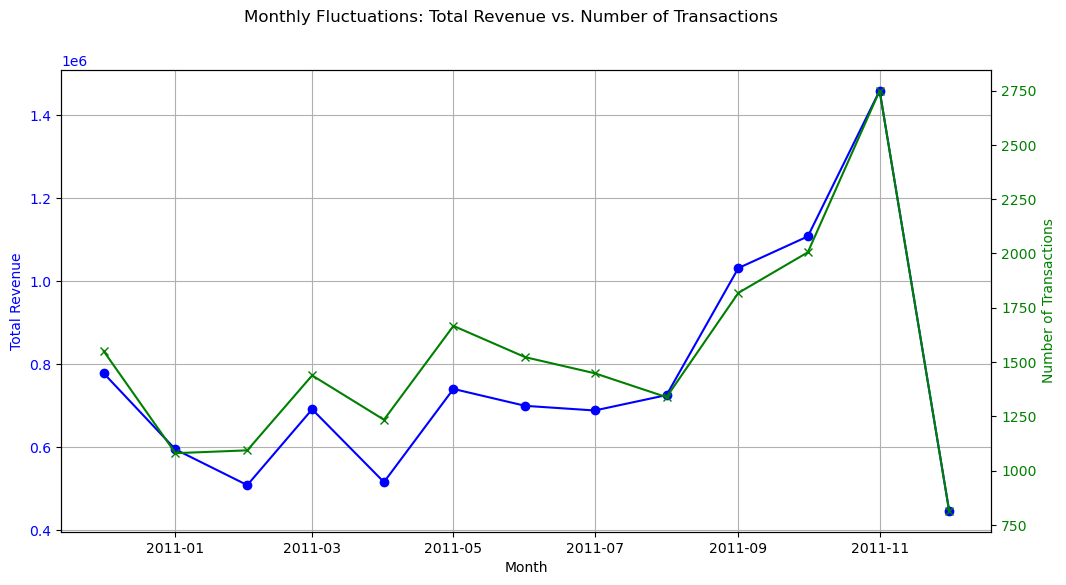

In [135]:
# Plot Total Revenue and Number of Transactions on separate axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Total Revenue
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.plot(monthly_data['YearMonth'], monthly_data['TotalRevenue'], label='Total Revenue', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for Number of Transactions
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Transactions', color='green')
ax2.plot(monthly_data['YearMonth'], monthly_data['Transactions'], label='Number of Transactions', color='green', marker='x')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
fig.suptitle('Monthly Fluctuations: Total Revenue vs. Number of Transactions')
ax1.grid()

# Show plot
plt.show()

The line graph illustrates the trends in revenue and transactions over a 13-month period starting in December 2010. It shows that each transaction generated a relatively consistent amount of revenue. The trends exhibit a cyclical pattern, with both revenue and transactions rising and falling consistently throughout the period. From December 2010 to January 2011, both metrics experienced a steady decline. However, while revenue continued to drop into February, the number of transactions saw a slight increase during that month before rebounding in March. Between May and August, the number of transactions declined steadily, while revenue remained relatively stable before resuming rapid growth. From August onwards, both revenue and transactions grew significantly, peaking in November. By December 2011, however, they plummeted to their lowest point of the year. 

The outliers in the plot are the revenue and number of transaction for October and November 2011



## 5.2 Determine which product categories have the highest total revenue and demonstrate consistent revenue growth trends. Identify any categories with sustained increases in sales

Due to the large number of unique descriptions, it will be challenging to analyse. As a result, grouping the items in the description into categories will enable better analysis and understanding. Based on the product categorisation in the Feature Engineering section, the number of items in each category is displayed in the plot below.

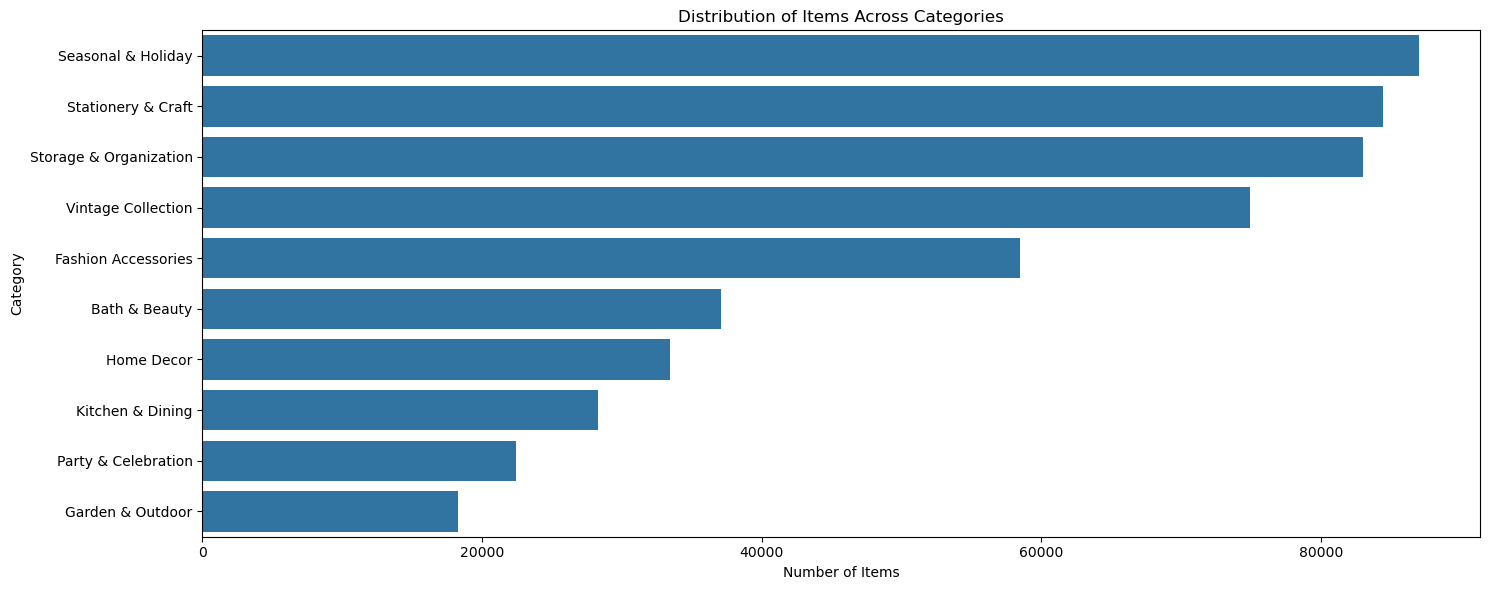

In [139]:
# Visualize category distribution
plt.figure(figsize=(15, 6))
category_sizes = df['Category_Name'].value_counts()
sns.barplot(x=category_sizes.values, y=category_sizes.index)
plt.title('Distribution of Items Across Categories')
plt.xlabel('Number of Items')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


The bar chart provides a visual representation of the item distribution across various categories in descending order. It highlights the areas where the business have a larger or smaller inventory. Seasonal & Holiday has the highest number of items, followed by stationery and crafts, then Storage and organization. Garden and Outdoors has the lowest number of items. 

In [141]:
# Print topics and example items with category names
print("Category Analysis:\n")
for idx, terms in enumerate(top_terms):
    print(f"Category: {category_names[idx]}")
    print(f"Key terms: {', '.join(terms)}")
    
    # Get example items
    topic_items = df[df['Category_Topic'] == idx]['Description'].head(3)
    print("\nExample items:")
    for item in topic_items:
        print(f"- {item}")
    
    # Print category size
    category_size = len(df[df['Category_Topic'] == idx])
    print(f"\nTotal items in category: {category_size}\n")


# Calculate average revenue per category
category_revenue = df.groupby('Category_Name')['TotalRevenue'].agg(['mean', 'sum', 'count']).round(2)
category_revenue = category_revenue.sort_values('sum', ascending=False)

print("\nCategory Revenue Analysis:")
print(category_revenue)

Category Analysis:

Category: Home Decor
Key terms: red, retrospot, red retrospot, bag red, bowl, bag, plate, retrospot charlotte, umbrella, doormat red

Example items:
- HAND WARMER RED POLKA DOT
- RED COAT RACK PARIS FASHION
- INFLATABLE POLITICAL GLOBE 

Total items in category: 33468

Category: Kitchen & Dining
Key terms: metal, sign, metal sign, french, blue metal, chocolate, toilet, blue, person metal, person

Example items:
- WHITE METAL LANTERN
- POPPY'S PLAYHOUSE BEDROOM 
- POPPY'S PLAYHOUSE KITCHEN

Total items in category: 28287

Category: Storage & Organization
Key terms: heart, light, holder, light holder, hanging, hanging heart, white, heart light, decoration, white hanging

Example items:
- WHITE HANGING HEART T-LIGHT HOLDER
- RED WOOLLY HOTTIE WHITE HEART.
- GLASS STAR FROSTED T-LIGHT HOLDER

Total items in category: 83017

Category: Party & Celebration
Key terms: jumbo, jumbo bag, bag, bag vintage, bag red, paisley, bag apples, bag pink, apples, strawberry

Example ite

Above are the samples of items in each category

Category Revenue (Sorted):
            Category_Name  TotalRevenue
0      Stationery & Craft    1702144.63
1  Storage & Organization    1699090.96
2      Seasonal & Holiday    1493339.76
3      Vintage Collection    1372958.01
4     Fashion Accessories    1018093.46
5              Home Decor     644875.73
6           Bath & Beauty     586069.11
7     Party & Celebration     565930.61
8        Kitchen & Dining     451996.89
9        Garden & Outdoor     451993.24


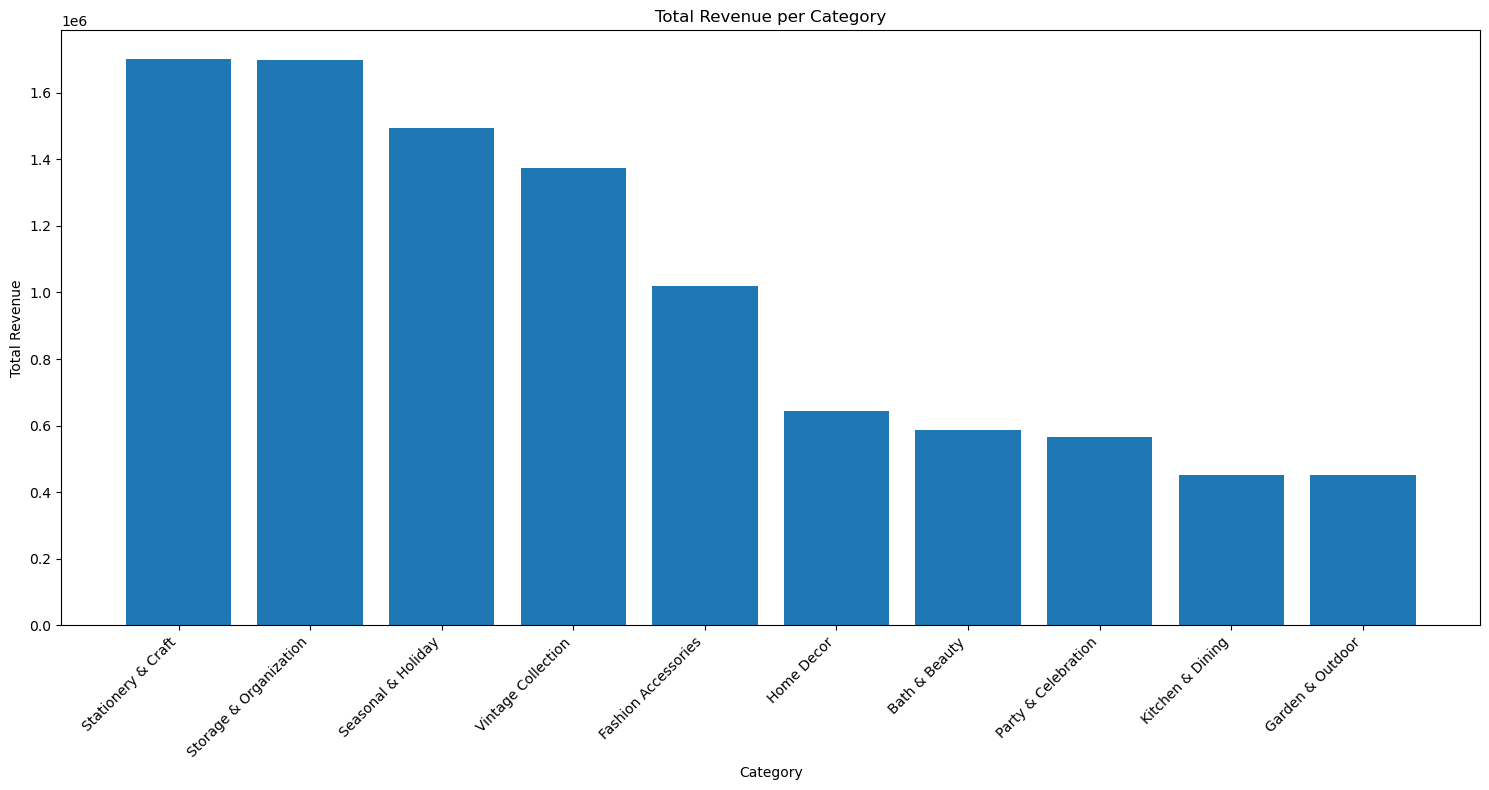

In [143]:
# Group categories by total revenue
category_revenue = df.groupby('Category_Name')['TotalRevenue'].sum().sort_values(ascending=False).reset_index()

# Display the grouped data
print("Category Revenue (Sorted):")
print(category_revenue)

# Plot the revenue per category
plt.figure(figsize=(15, 8))
plt.bar(category_revenue['Category_Name'], category_revenue['TotalRevenue'])
plt.title('Total Revenue per Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bar graph above shows the total revenue generated by each category of items sold. It highlights the areas where the business may be most successful or need improvemen. tStationery & Craft and Storage & Organization almost at par have the highest revenue, followed by Seasonal and Holiday. Garden and Outdoor has the lowest revenuein the period under review

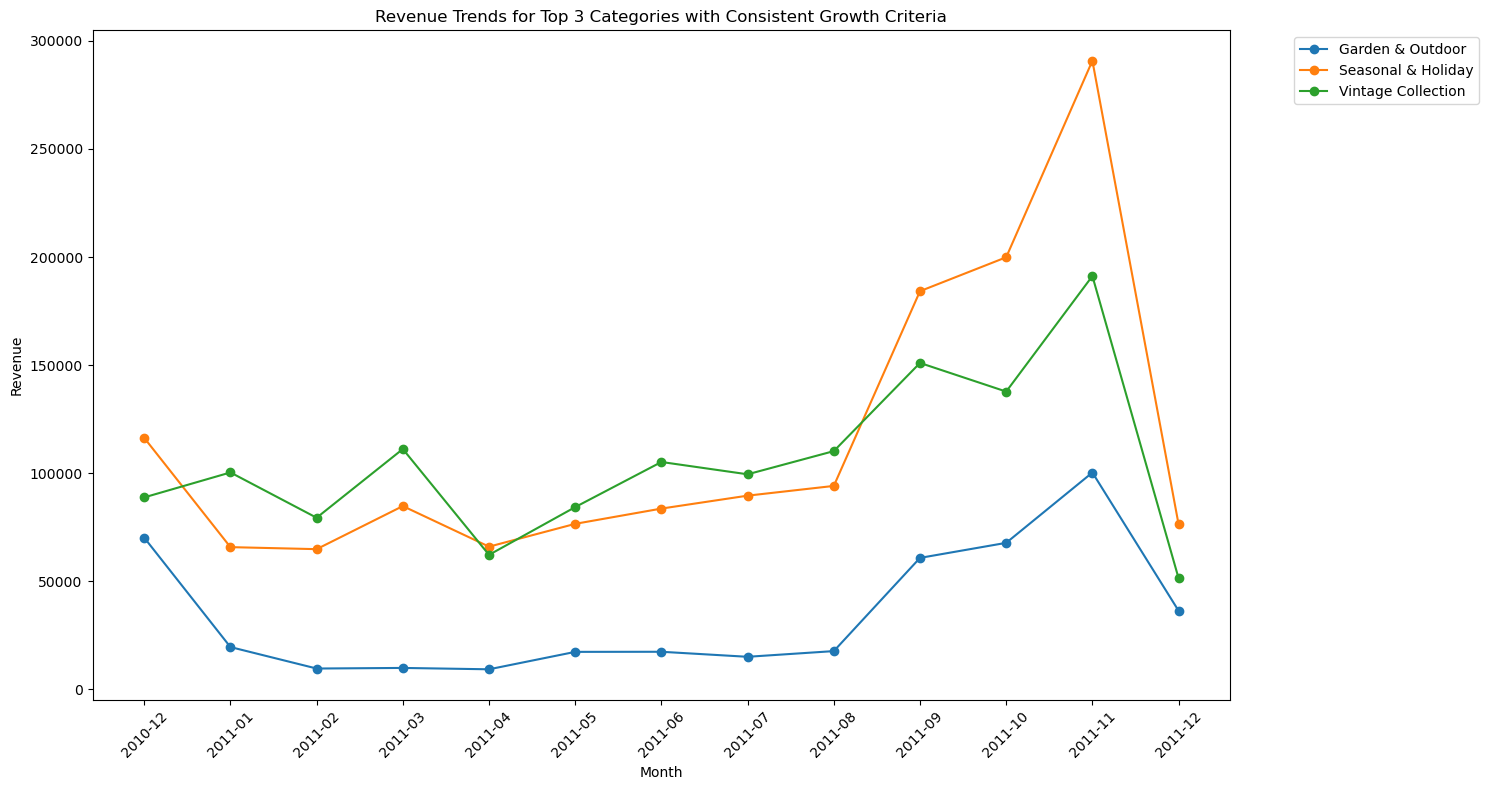

In [145]:
# Extract month-year for grouping
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly revenue per category
monthly_category_revenue = df.groupby(['Month', 'Category_Name'])['TotalRevenue'].sum().reset_index()

# Pivot the data for easier analysis
pivot_data = monthly_category_revenue.pivot(index='Month', columns='Category_Name', values='TotalRevenue')

# Calculate month-over-month growth rates
growth_rates = pivot_data.pct_change()

# Calculate adjusted consistency metrics
consistency_metrics = pd.DataFrame({
    'Avg_Growth': growth_rates.mean(),
    'Negative_Months': (growth_rates < 0).sum(),
    'Total_Months': growth_rates.count()
})

# Filter for categories with positive average growth and fewer than 50% negative months
consistency_metrics = consistency_metrics[
    (consistency_metrics['Avg_Growth'] > 0) & 
    (consistency_metrics['Negative_Months'] < consistency_metrics['Total_Months'] * 0.5)
].sort_values('Avg_Growth', ascending=False)


# Plot the trends for top consistent categories with adjusted criteria
plt.figure(figsize=(15, 8))
for category in consistency_metrics.index:
    plt.plot(pivot_data.index.astype(str), pivot_data[category], label=category, marker='o')

plt.xticks(rotation=45)
plt.title('Revenue Trends for Top 3 Categories with Consistent Growth Criteria')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [146]:

# Display the adjusted consistent growing categories
print("Consistent growing categories:")
consistency_metrics


Consistent growing categories:


,Avg_Growth,Negative_Months,Total_Months
Category_Name,,,
Garden & Outdoor,0.169139,5,12
Seasonal & Holiday,0.064166,4,12
Vintage Collection,0.039659,5,12


The line chart illustrates revenue trends for categories with relatively steady growth over the period. Although there are occasional dips, the overall trajectory reflects a consistent upward trend. While these top three categories may not achieve the highest revenue during the period, their growth remains stable and shows periods of notable increase

## 5.3 Explore the seasonal variations in sales for different product categories. Are there any categories that are sensitive to specific time periods? 

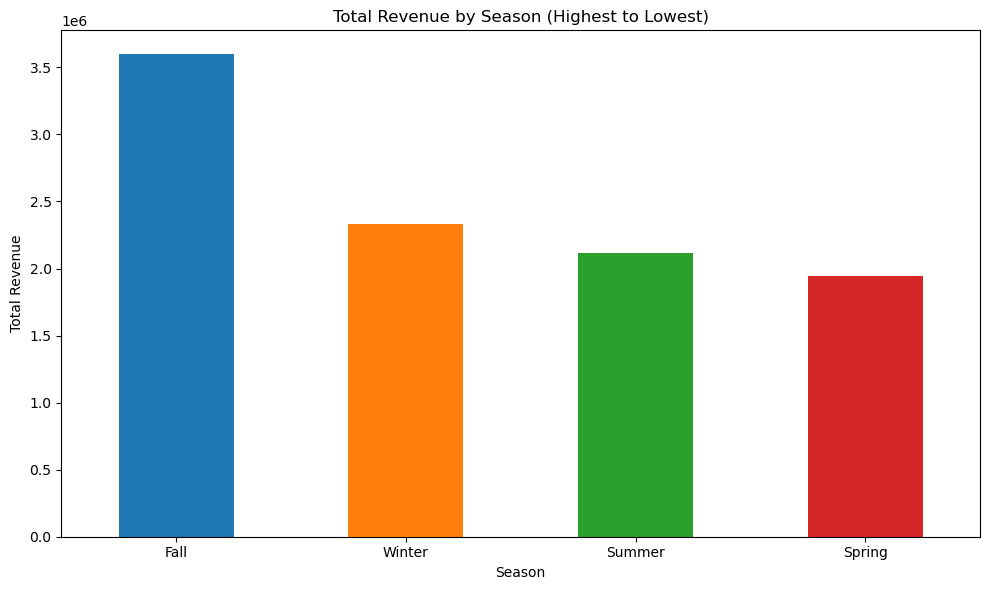

In [149]:
# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add a season column
df['Season'] = df['InvoiceDate'].dt.month.apply(get_season)

# Calculate total revenue for each season
seasonal_revenue = df.groupby('Season')['TotalRevenue'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Sort seasonal revenue from highest to lowest
sorted_seasonal_revenue = seasonal_revenue.sort_values(ascending=False)

# Plot the sorted seasonal revenue as a bar chart
plt.figure(figsize=(10, 6))
sorted_seasonal_revenue.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Total Revenue by Season (Highest to Lowest)')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

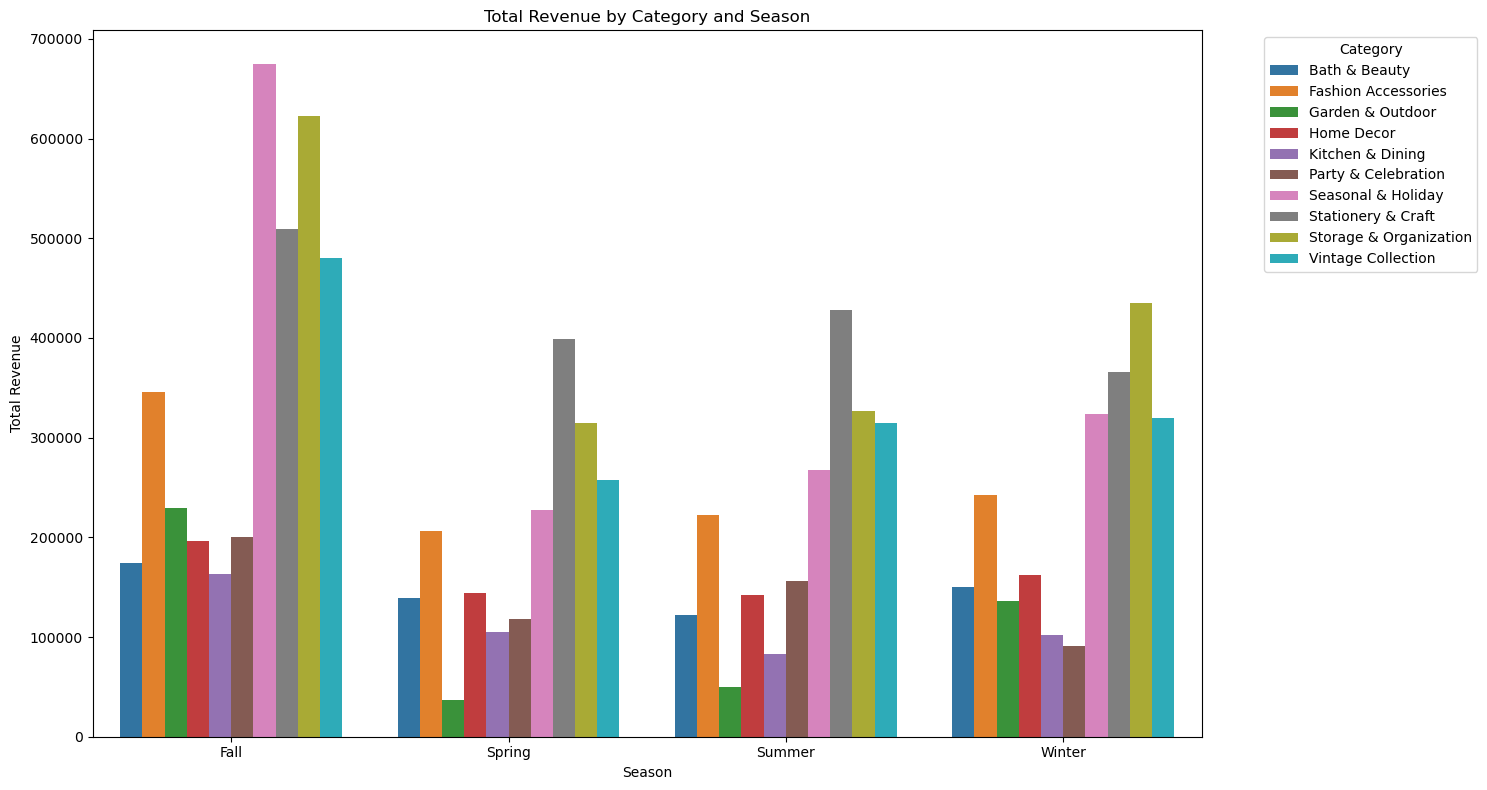

In [150]:
# Group data by Category and Season, then calculate total revenue
category_season_revenue = df.groupby(['Category_Name', 'Season'])['TotalRevenue'].sum().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=category_season_revenue, x='Season', y='TotalRevenue', hue='Category_Name', palette='tab10')

plt.title('Total Revenue by Category and Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

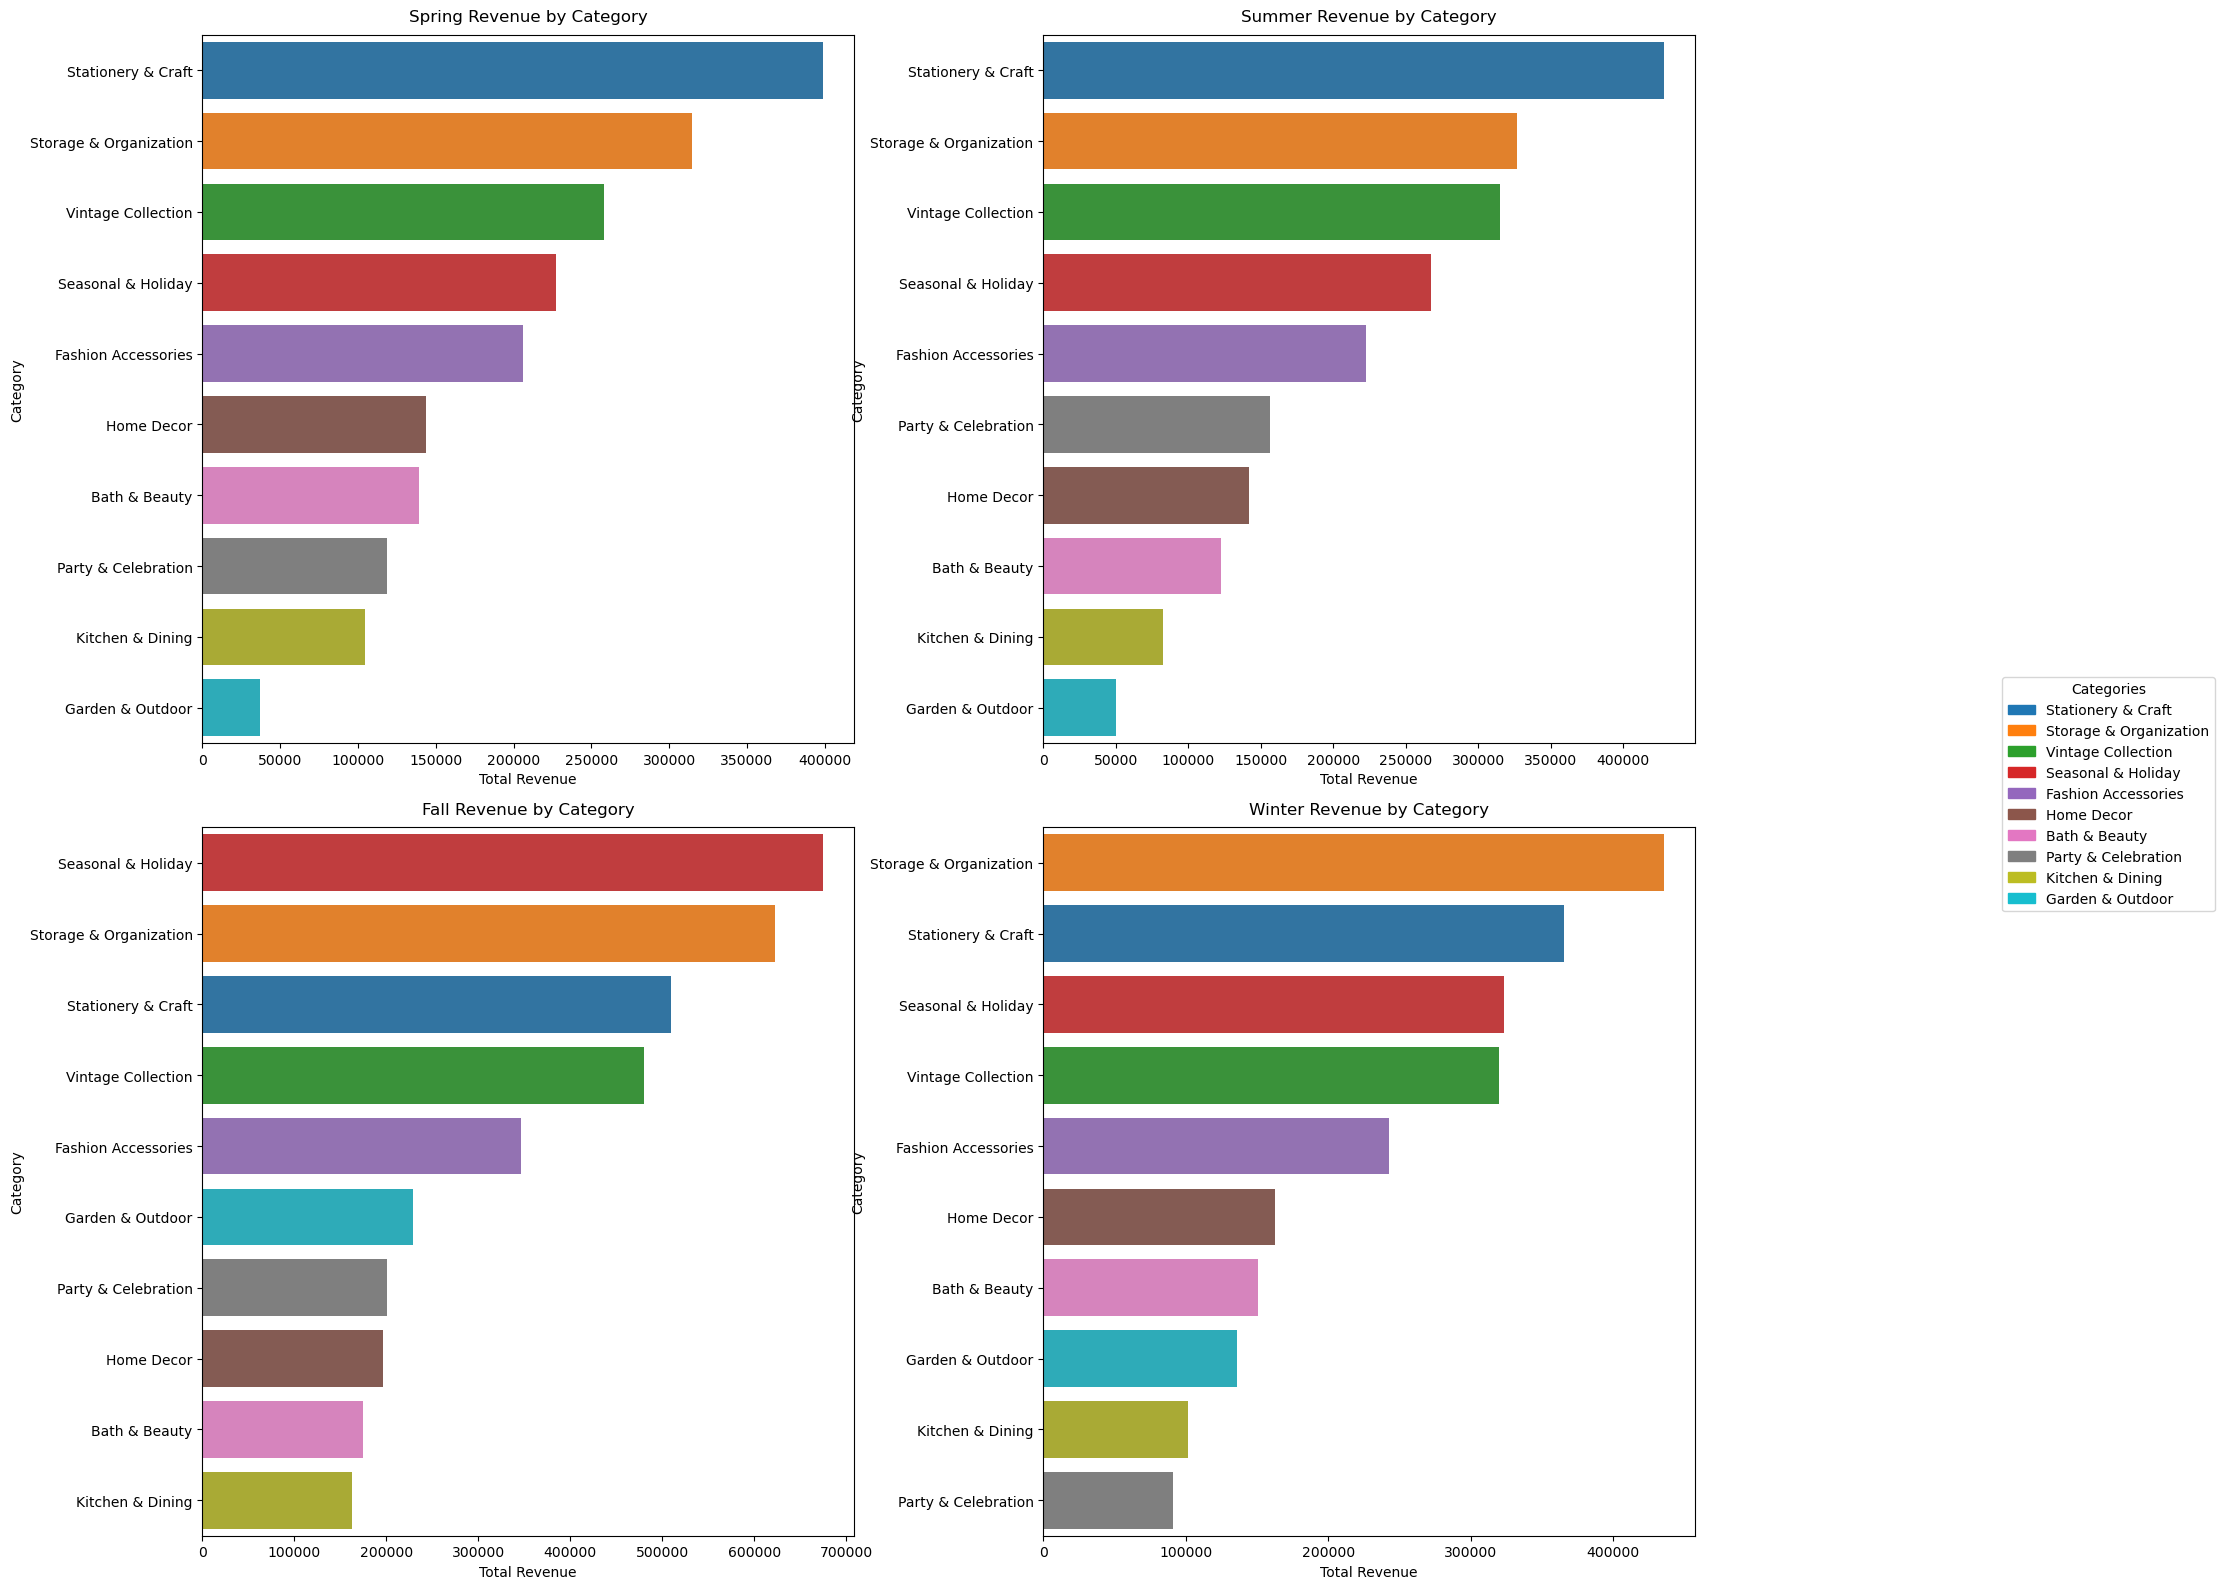

Spring Revenue by Category:
         Category_Name  TotalRevenue
    Stationery & Craft     398854.75
Storage & Organization     314727.07
    Vintage Collection     257835.42
    Seasonal & Holiday     227498.50
   Fashion Accessories     206129.20
            Home Decor     143939.25
         Bath & Beauty     138918.30
   Party & Celebration     118466.23
      Kitchen & Dining     104648.81
      Garden & Outdoor      36717.18
Summer Revenue by Category:
         Category_Name  TotalRevenue
    Stationery & Craft     428014.15
Storage & Organization     326398.44
    Vintage Collection     314994.30
    Seasonal & Holiday     267472.63
   Fashion Accessories     222846.30
   Party & Celebration     156172.13
            Home Decor     142012.30
         Bath & Beauty     122477.26
      Kitchen & Dining      82812.46
      Garden & Outdoor      50323.80
Fall Revenue by Category:
         Category_Name  TotalRevenue
    Seasonal & Holiday     674900.21
Storage & Organization     622

In [151]:

# Add season column
df['Season'] = df['InvoiceDate'].dt.month.apply(get_season)

# Calculate revenue by category and season
category_season_revenue = df.groupby(['Category_Name', 'Season'])['TotalRevenue'].sum().reset_index()

# Define consistent colors for categories
category_colors = {
    'Stationery & Craft': '#1f77b4',        # blue
    'Storage & Organization': '#ff7f0e',     # orange
    'Vintage Collection': '#2ca02c',         # green
    'Seasonal & Holiday': '#d62728',         # red
    'Fashion Accessories': '#9467bd',        # purple
    'Home Decor': '#8c564b',                # brown
    'Bath & Beauty': '#e377c2',             # pink
    'Party & Celebration': '#7f7f7f',        # gray
    'Kitchen & Dining': '#bcbd22',          # yellow-green
    'Garden & Outdoor': '#17becf'           # cyan
}

# Create the 4-season subplot
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

#  Plot each season
for idx, season in enumerate(seasons):
    # Filter and sort data for each season
    season_data = category_season_revenue[category_season_revenue['Season'] == season].sort_values('TotalRevenue', ascending=False)
    
    # Create horizontal bar chart with updated syntax
    sns.barplot(data=season_data, 
                y='Category_Name', 
                x='TotalRevenue', 
                hue='Category_Name',  # Add hue parameter
                ax=axes[idx],
                palette=category_colors,
                legend=False)  # Hide individual legends
    
    # Customize each subplot
    axes[idx].set_title(f'{season} Revenue by Category', fontsize=12, pad=10)
    axes[idx].set_xlabel('Total Revenue', fontsize=10)
    axes[idx].set_ylabel('Category', fontsize=10)

# Add common legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in category_colors.values()]
fig.legend(handles, category_colors.keys(), 
          loc='center left', 
          bbox_to_anchor=(1, 0.5),
          title='Categories')

#  Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for legend

# Show the plot
plt.show()

# Print revenue summary for each season
for season in seasons:
    print(f"\
{season} Revenue by Category:")
    season_data = category_season_revenue[category_season_revenue['Season'] == season].sort_values('TotalRevenue', ascending=False)
    print(season_data[['Category_Name', 'TotalRevenue']].to_string(index=False))

The four bar charts, each representing the revenue generated by different product categories across four seasons: Spring, Summer, Fall, and Winter

Stationery & Craft and Storage & Organization consistently rank high in revenue across all seasons.
Seasonal & Holiday items see a significant boost in revenue during the respective seasons (e.g., high in Fall and Winter).
Garden & Outdoor tends to perform better in Spring and Summer.
Seasonal Trends:

- Spring: Stationery & Craft and Storage & Organization lead, followed by Seasonal & Holiday.
- Summer: Stationery & Craft and Storage & Organization remain strong, with Fashion Accessories gaining ground.
- Fall: Seasonal & Holiday takes the top spot, followed by Stationery & Craft and Storage & Organization.
- Winter: Seasonal & Holiday dominates, with Stationery & Craft and Storage & Organization still performing well.

Seasonal Sensitivity
- Seasonal & Holiday: This category is most sensitive to seasonal changes, with revenue peaking during the corresponding seasons (e.g., high in Fall and Winter).
- Garden & Outdoor: This category shows higher revenue in Spring and Summer, suggesting sensitivity to warmer weather and outdoor activities



REGENCY CAKESTAND 3 TIER outperforms the other products in terms of revenue generation. It leads with £174,459 in total revenue. WHITE HANGING HEART T-LIGHT HOLDER and PARTY BUNTING follow with over £99,000 each

Category, Month, and Revenue:
          Category_Name    Month  TotalRevenue
0         Bath & Beauty  2010-12      46755.40
1         Bath & Beauty  2011-01      49433.18
2         Bath & Beauty  2011-02      33042.19
3         Bath & Beauty  2011-03      49566.29
4         Bath & Beauty  2011-04      44144.49
..                  ...      ...           ...
125  Vintage Collection  2011-08     110249.57
126  Vintage Collection  2011-09     151026.21
127  Vintage Collection  2011-10     137778.72
128  Vintage Collection  2011-11     191219.69
129  Vintage Collection  2011-12      51449.22

[130 rows x 3 columns]
Pivot Table - Monthly Revenue by Category:
Category_Name  Bath & Beauty  Fashion Accessories  Garden & Outdoor  \
Month                                                                 
2010-12             46755.40             84095.58          70198.87   
2011-01             49433.18             57097.38          19625.68   
2011-02             33042.19             54468.00      

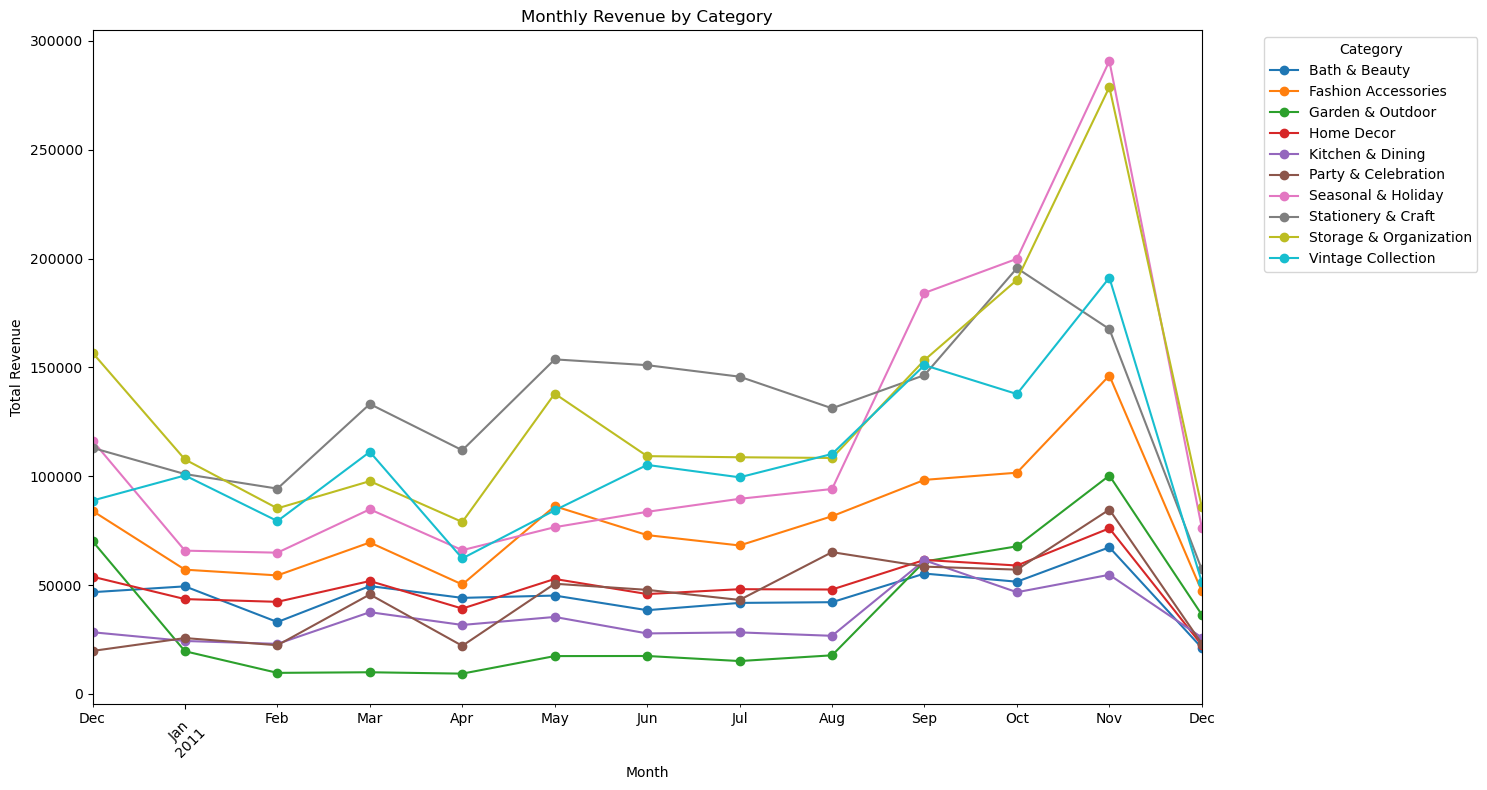

In [155]:
# Group by Category_Name and Month, and calculate the total revenue
category_month_revenue = (
    df.groupby(['Category_Name', 'Month'])['TotalRevenue']
    .sum()
    .reset_index()
    .sort_values(by=['Category_Name', 'Month'])
)

# Display the grouped data
print("Category, Month, and Revenue:")
print(category_month_revenue)

# Optional: Pivot table for easier visualization
pivot_table = category_month_revenue.pivot(index='Month', columns='Category_Name', values='TotalRevenue')

# Display the pivot table
print("Pivot Table - Monthly Revenue by Category:")
print(pivot_table)

# Plotting the data (optional)
pivot_table.plot(figsize=(15, 8), marker='o')
plt.title('Monthly Revenue by Category')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [156]:
# Calculate average revenue per category
category_revenue = df.groupby('Category_Name')['TotalRevenue'].agg(['mean', 'sum', 'count']).round(2)
category_revenue = category_revenue.sort_values('sum', ascending=False)

print("\
Category Revenue Analysis:")
print(category_revenue)

Category Revenue Analysis:
                         mean         sum  count
Category_Name                                   
Stationery & Craft      20.16  1702144.63  84420
Storage & Organization  20.47  1699090.96  83017
Seasonal & Holiday      17.16  1493339.76  87014
Vintage Collection      18.32  1372958.01  74944
Fashion Accessories     17.41  1018093.46  58494
Home Decor              19.27   644875.73  33468
Bath & Beauty           15.81   586069.11  37068
Party & Celebration     25.23   565930.61  22435
Kitchen & Dining        15.98   451996.89  28287
Garden & Outdoor        24.70   451993.24  18301


## 5.4  Analyse shifts in customer purchasing behaviour across multiple transactions to identify recurring patterns or significant changes in preferences. Determine whether trends can provide actionable insights for enhancing the company's marketing strategy

In [158]:
# Extract temporal features
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()

print("Data loaded and temporal features extracted")
print("\
Dataset Shape:", df.shape)

Data loaded and temporal features extracted
Dataset Shape: (527448, 17)


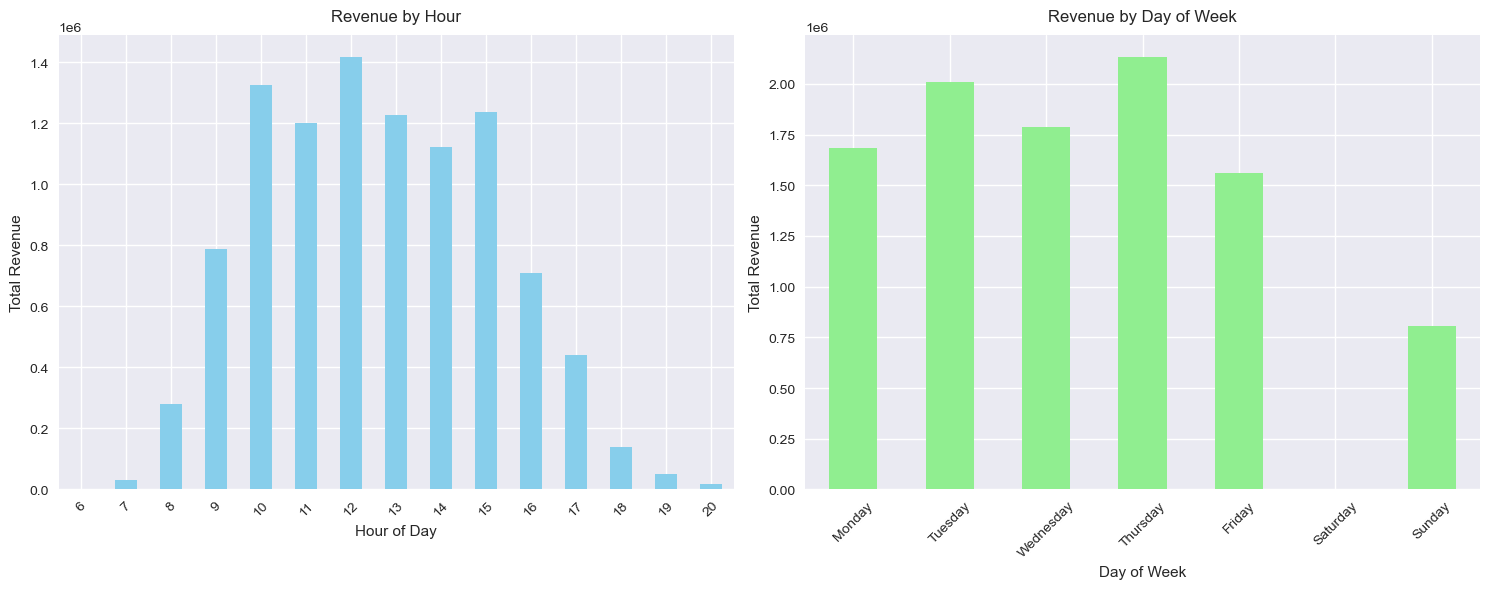

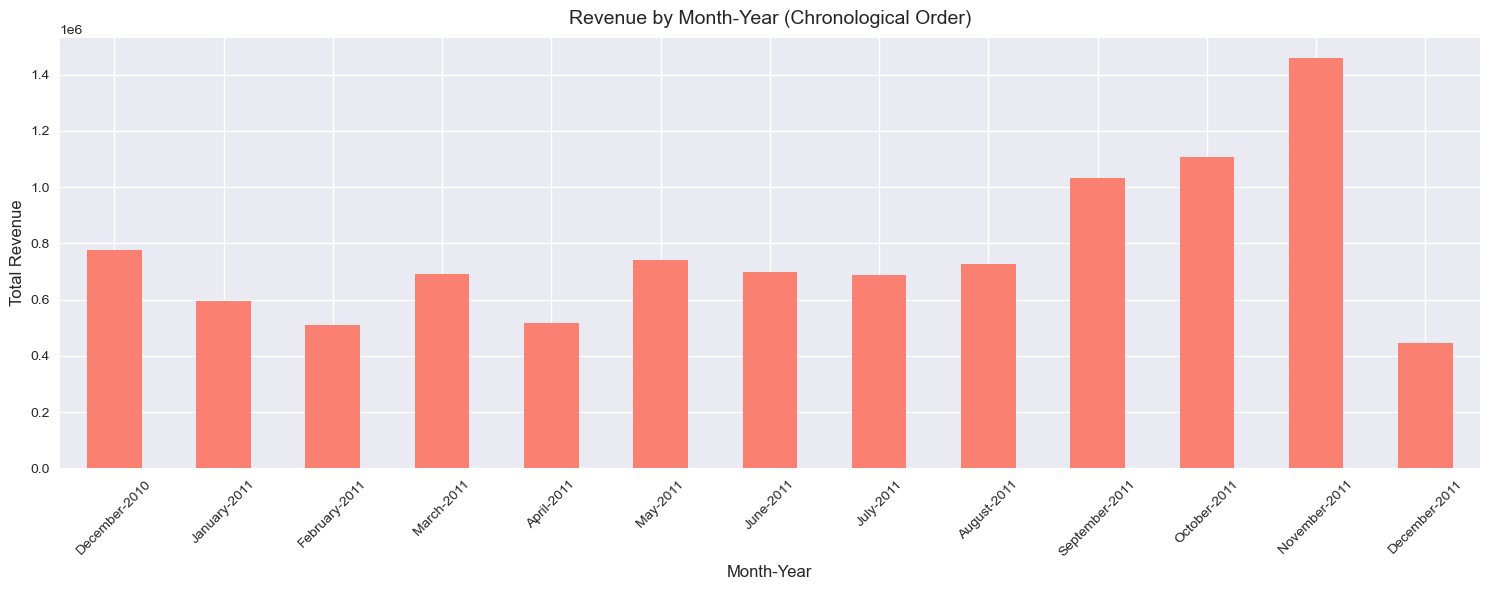

In [159]:
# Extract hour, day, and month-year
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Month-Year'] = df['InvoiceDate'].dt.strftime('%B-%Y')

# Analyze the best hour, day, and month of purchase
hourly_revenue = df.groupby('Hour')['TotalRevenue'].sum()
daily_revenue = df.groupby('Day')['TotalRevenue'].sum()
monthly_revenue = df.groupby('Month-Year')['TotalRevenue'].sum()

# Sort the results for better visualization
daily_revenue = daily_revenue.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
monthly_revenue = monthly_revenue.sort_index(key=lambda x: pd.to_datetime(x, format='%B-%Y'))

# Set figure style
plt.style.use('seaborn-v0_8')  # Using the correct style name

# Create two separate figures
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Hourly revenue
hourly_revenue.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Revenue by Hour', fontsize=12, pad=10)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Total Revenue')
ax1.tick_params(axis='x', rotation=45)

# Daily revenue
daily_revenue.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('Revenue by Day of Week', fontsize=12, pad=10)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Total Revenue')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create separate figure for monthly revenue
fig2, ax3 = plt.subplots(figsize=(15, 6))

# Monthly revenue
monthly_revenue.plot(kind='bar', color='salmon', ax=ax3)
ax3.set_title('Revenue by Month-Year (Chronological Order)', fontsize=14, pad=10)
ax3.set_xlabel('Month-Year', fontsize=12)
ax3.set_ylabel('Total Revenue', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [160]:
# Print the best hour, day, and month with their revenues
best_hour = hourly_revenue.idxmax()
best_day = daily_revenue.idxmax()
best_month = monthly_revenue.idxmax()

print(f"Best Hour of Purchase: {best_hour}:00 (Revenue: ${hourly_revenue[best_hour]:,.2f})")
print(f"Best Day of Purchase: {best_day} (Revenue: ${daily_revenue[best_day]:,.2f})")
print(f"Best Month-Year of Purchase: {best_month} (Revenue: ${monthly_revenue[best_month]:,.2f})")

# Print monthly revenue in chronological order with formatted values
print("\
Monthly Revenue Breakdown (Chronological Order):")
for month, revenue in monthly_revenue.items():
    print(f"{month}: ${revenue:,.2f}")

Best Hour of Purchase: 12:00 (Revenue: $1,418,297.40)
Best Day of Purchase: Thursday (Revenue: $2,134,751.31)
Best Month-Year of Purchase: November-2011 (Revenue: $1,457,926.49)
Monthly Revenue Breakdown (Chronological Order):
December-2010: $778,018.36
January-2011: $594,713.81
February-2011: $508,856.42
March-2011: $691,300.92
April-2011: $516,109.11
May-2011: $740,324.68
June-2011: $699,621.60
July-2011: $688,447.78
August-2011: $725,454.39
September-2011: $1,031,106.93
October-2011: $1,107,383.20
November-2011: $1,457,926.49
December-2011: $447,228.71


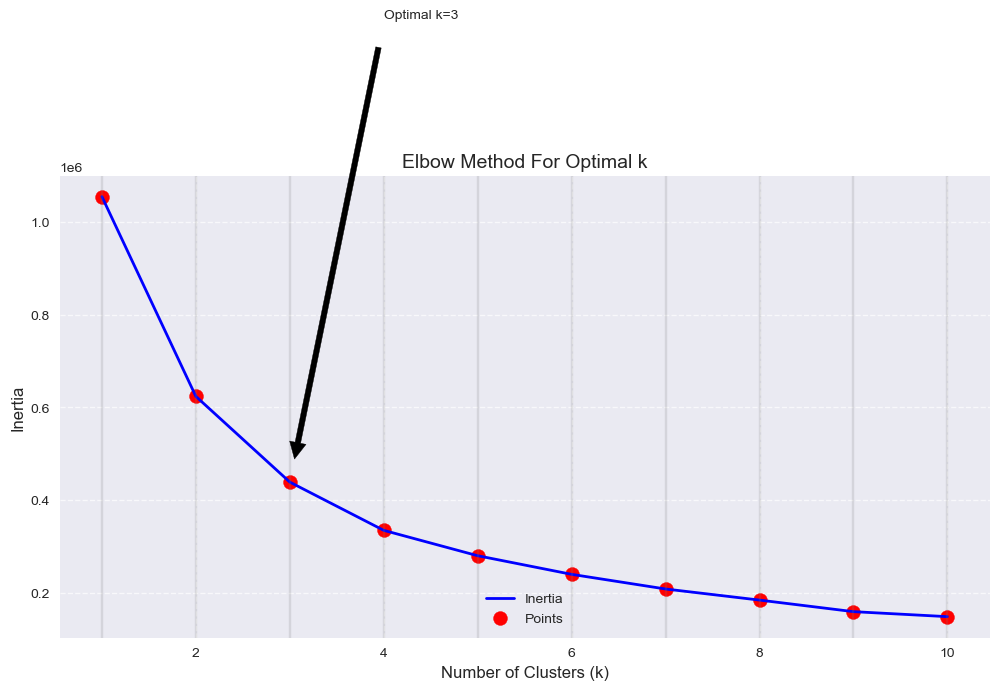

In [161]:
df = df[df['TotalRevenue'] > 0]
df = df[df['Quantity'] > 0]
transaction_data = df[['TotalRevenue', 'Quantity']]

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transaction_data)

# Calculate inertia for different numbers of clusters
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plot elbow curve with points
plt.figure(figsize=(12, 6))
plt.plot(K, inertias, 'bx-', linewidth=2, markersize=8, label='Inertia')
plt.scatter(K, inertias, c='red', marker='o', s=100, label='Points')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add vertical lines to make it easier to read
for x in K:
    plt.axvline(x=x, color='gray', alpha=0.2)

# Annotate the optimal k point (k=3)
optimal_k = 3
plt.annotate(f'Optimal k={optimal_k}', 
             xy=(optimal_k, inertias[optimal_k-1]),
             xytext=(optimal_k+1, inertias[optimal_k-1]+1000000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.show()

In [162]:
# Print the inertia values for each k
print("\
Inertia values for each k:")
for k, inertia in zip(K, inertias):
    print(f"k={k}: {inertia:.2f}")

Inertia values for each k:
k=1: 1054896.00
k=2: 623943.57
k=3: 439044.38
k=4: 334904.64
k=5: 280150.72
k=6: 239985.52
k=7: 208371.30
k=8: 184441.56
k=9: 159491.19
k=10: 148716.20


In [ ]:

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Create custom color map
colors = ['blue', 'green', 'orange']
custom_cmap = ListedColormap(colors)

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['TotalRevenue'], df['Quantity'], 
                     c=df['Cluster'], cmap=custom_cmap, 
                     alpha=0.6)

# Add cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
center_scatter = plt.scatter(centers[:, 0], centers[:, 1], 
                           c='red', marker='x', s=200, linewidth=3, 
                           label='Cluster Centers')

plt.xlabel('Total Revenue (£)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Customer Clusters based on Revenue and Quantity', fontsize=14)

# Add legend with correct markers
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.legend([center_scatter], ['Cluster Centers'], loc='upper right', 
           scatterpoints=1, markerfirst=True)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Print cluster statistics
print("\
Cluster Statistics:")
print("\
Number of customers in each cluster:")
df['Cluster'].value_counts().sort_index()

In [ ]:
print("\
Detailed cluster statistics:")
cluster_stats = df.groupby('Cluster').agg({
    'TotalRevenue': ['count', 'mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max']
}).round(2)
cluster_stats

In [ ]:
# Filter data and create transaction number
df_filtered = df[(df['TotalRevenue'] > 0) & (df['Quantity'] > 0)]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered['Transaction_Number'] = range(1, len(df_filtered) + 1)

# Create custom color map
colors = ['blue', 'green', 'orange']
custom_cmap = ListedColormap(colors)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Total Revenue vs Transaction Number
scatter1 = ax1.scatter(df_filtered['Transaction_Number'], 
                      df_filtered['TotalRevenue'],
                      c=df_filtered['Cluster'],
                      cmap=custom_cmap,
                      alpha=0.6)
ax1.set_xlabel('Transaction Number')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Total Revenue vs Transaction Number')
ax1.legend(*scatter1.legend_elements(), title="Clusters")

# Plot 2: Quantity vs Transaction Number
scatter2 = ax2.scatter(df_filtered['Transaction_Number'], 
                      df_filtered['Quantity'],
                      c=df_filtered['Cluster'],
                      cmap=custom_cmap,
                      alpha=0.6)
ax2.set_xlabel('Transaction Number')
ax2.set_ylabel('Quantity')
ax2.set_title('Quantity vs Transaction Number')
ax2.legend(*scatter2.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()

The distribution of points in both plots are concentrated more towards lower revenue and lower quantities. Indicating that a large number of customers spend little and buy smaller quantities of items. 